<a href="https://colab.research.google.com/github/Brenda-kekala/AI-Coursework2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")

# Preview the first few rows
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [4]:
df.drop_duplicates(inplace=True)


In [5]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]



In [6]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
Index: 50271 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50271 non-null  float64
 1   cut      50271 non-null  object 
 2   color    50271 non-null  object 
 3   clarity  50271 non-null  object 
 4   depth    50271 non-null  float64
 5   table    50271 non-null  float64
 6   price    50271 non-null  int64  
 7   x        50271 non-null  float64
 8   y        50271 non-null  float64
 9   z        50271 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


,carat,depth,table,price,x,y,z
count,50271.000000,50271.000000,50271.000000,50271.000000,50271.000000,50271.000000,50271.000000
mean,0.723744,61.754445,57.422836,3161.279982,5.583457,5.586804,3.448622
std,0.383515,1.427967,2.228483,2765.577939,0.994177,0.993285,0.630035
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,0.700000,61.800000,57.000000,2159.000000,5.590000,5.580000,3.430000
75%,1.010000,62.500000,59.000000,4670.500000,6.430000,6.420000,3.980000
max,3.650000,79.000000,79.000000,11888.000000,9.540000,31.800000,31.800000


In [8]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)


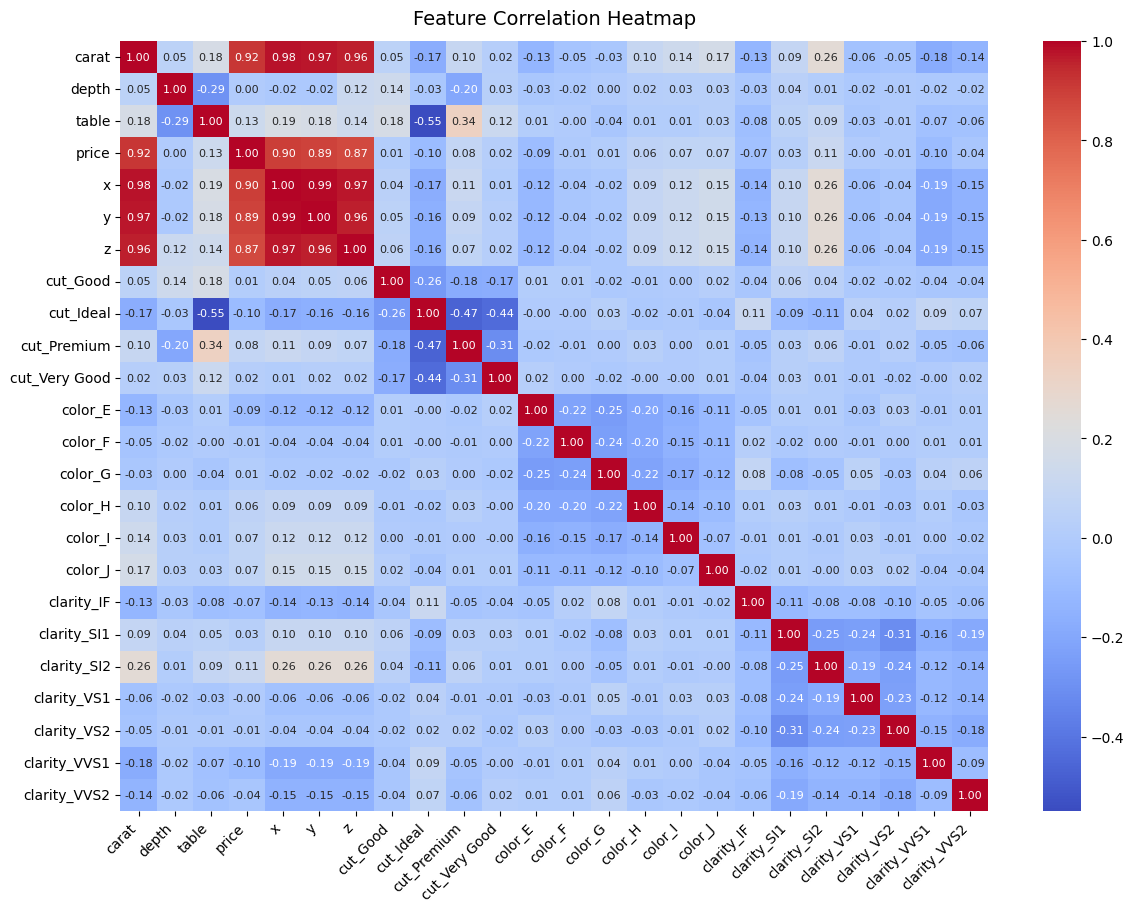

/tmp/ipython-input-653419526.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_price.values, y=corr_price.index, palette='coolwarm')


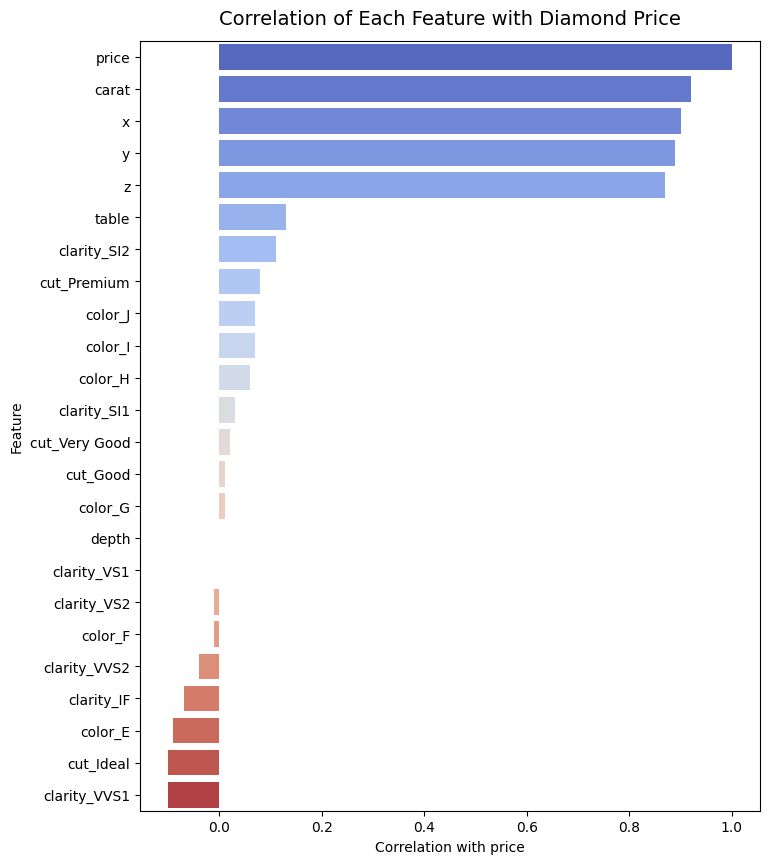

In [15]:

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_encoded = df.copy()

corr_matrix = df_encoded.corr().round(2)  # round to 2 decimal places

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,          # show correlation values
    fmt=".2f",           # two decimal places
    annot_kws={"size": 8}  # small enough to fit neatly
)
plt.title("Feature Correlation Heatmap", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


# Plot correlation of each feature with price
corr_price = corr_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=corr_price.values, y=corr_price.index, palette='coolwarm')
plt.title("Correlation of Each Feature with Diamond Price", fontsize=14, pad=12)
plt.xlabel("Correlation with price")
plt.ylabel("Feature")
plt.show()


In [16]:
diamonds_model = df.sample(n=12500, random_state=42)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = diamonds_model.drop('price', axis=1)
y = diamonds_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)



In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_cont = diamonds_model[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds_model['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cont)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train_pca)

y_pred_pca = pca_model.predict(X_test_pca)


In [25]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.668e+08, tolerance: 7.668e+06
  model = cd_fast.enet_coordinate_descent(


In [26]:
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

results = {
    'Model': ['Linear Regression', 'PCA Regression', 'Lasso Regression', 'Ridge Regression'],
    'R2 Score': [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test_pca, y_pred_pca),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lin),
        mean_squared_error(y_test_pca, y_pred_pca),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge)
    ]
}

results_df = pd.DataFrame(results)
results_df



,Model,R2 Score,MSE
0,Linear Regression,0.921773,5.403575e+05
1,PCA Regression,0.819887,1.244135e+06
2,Lasso Regression,0.921722,5.407068e+05
3,Ridge Regression,0.921554,5.418704e+05


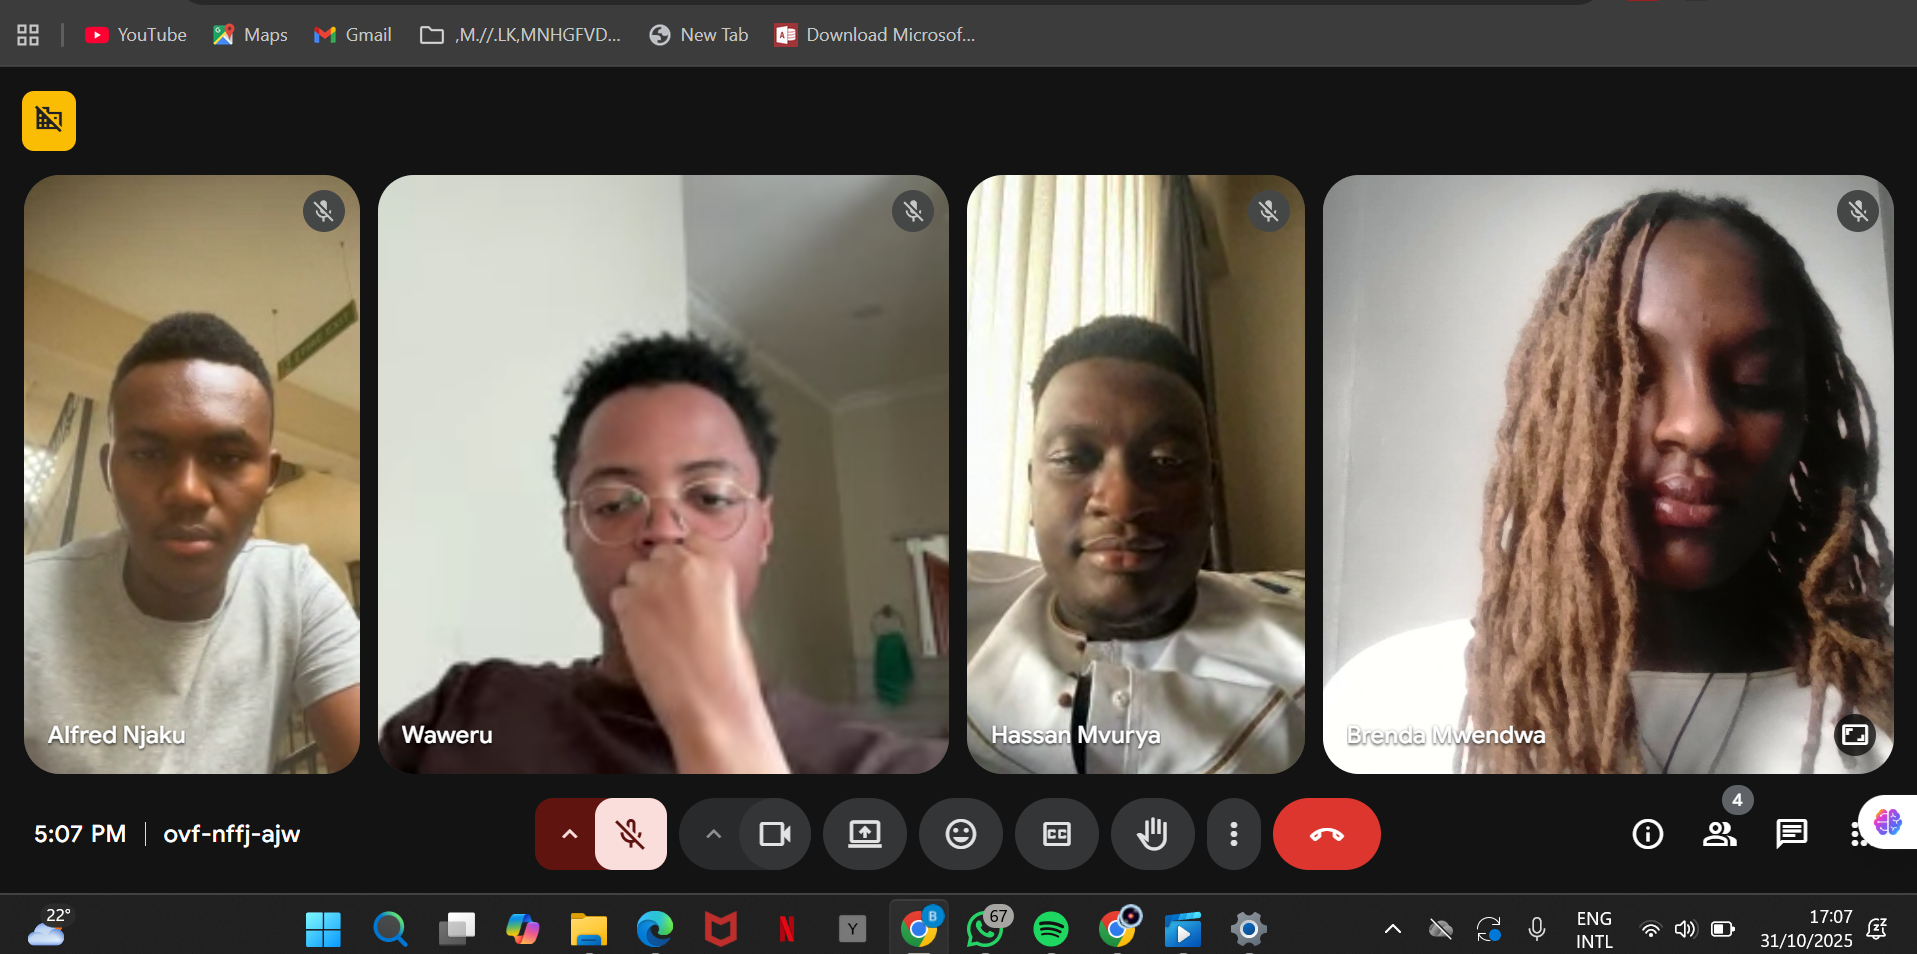